In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [3]:
# read in data to panda

InPi_default="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_singleData_20240527.pkl"

## ## ## from subsampling
InPi_change1="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub35_20240527.pkl"
InPi_change2="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub50_20240527.pkl"
InPi_change3="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/PiDiversity_Overview_sub100_20240527.pkl"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_end = [1.50750e+07, 3.03500e+07, 4.41350e+07, 6.16300e+07, 8.25550e+07, 1.00270e+08, 1.00285e+08]
#files

In [17]:
## get all the data
overview = pd.read_pickle(InPi_default)
df_change1 = pd.read_pickle(InPi_change1)
df_change2 = pd.read_pickle(InPi_change2)
df_change3 = pd.read_pickle(InPi_change3)

In [18]:
# only look at backbone
overviewBB = overview.loc[(overview['treatment']=="bb") | (overview['treatment']=="anc")]
overviewnotBB = overview.loc[(overview['treatment']!="bb") | (overview['treatment']=="anc")]
overviewW0 = overview.loc[(overview['week']==0)]
overviewW1 = overview.loc[(overview['week']==1)]
overviewW15 = overview.loc[(overview['week']==15)]

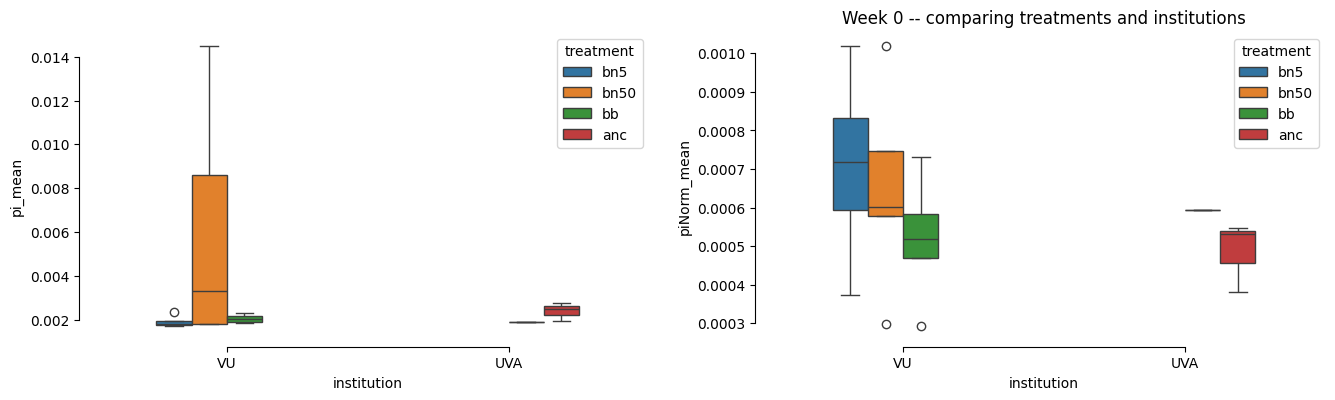

In [19]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(1,2, figsize=(16,4))
plt.title('Week 0 -- comparing treatments and institutions')
sns.boxplot(data=overviewW0, x="institution", y="pi_mean", hue="treatment", width=0.5, ax=ax1[0])
#sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
sns.boxplot(data=overviewW0, x="institution", y="piNorm_mean", hue="treatment", width=0.5, ax=ax1[1])
#sns.move_legend(ax1[1], "upper left", bbox_to_anchor=(1, 1))

sns.despine(offset=5, trim=True)


Text(0.5, 1.0, 'Week 15 -- comparing institutions')

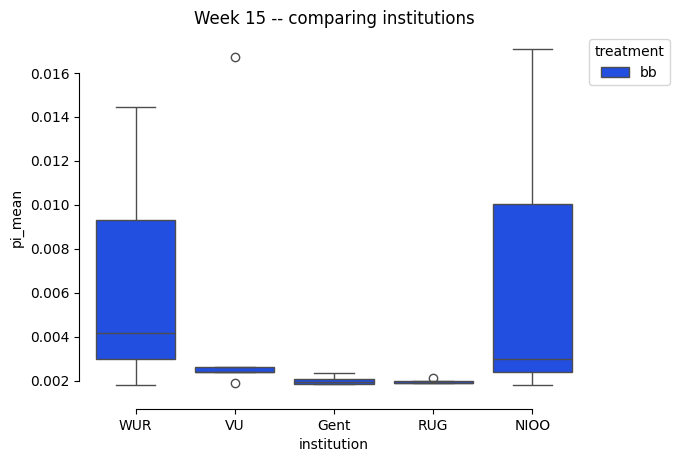

In [20]:
## hypothesis: the different conditions per institution make sense .. right?

ax4 = sns.boxplot(data=overviewW15, x="institution", y="pi_mean", hue="treatment", palette="bright")
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)
plt.title('Week 15 -- comparing institutions')

Text(0.5, 1.0, 'comparing timepoints for institutions+treatments')

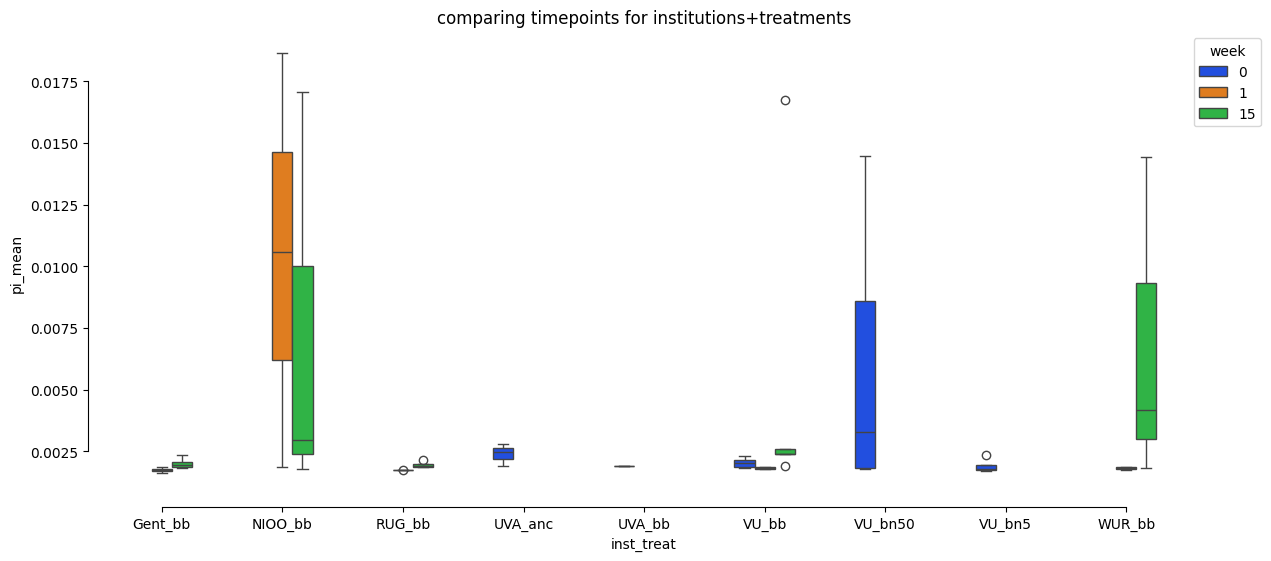

In [21]:
## hypothesis: diversity goes down over time ... or does it?

fig, ax2 = plt.subplots(figsize=(14,6))
ax2 = sns.boxplot(data=overview.sort_index(), x="inst_treat", y="pi_mean", hue="week", palette="bright", width=0.5)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=10, trim=True)
plt.title('comparing timepoints for institutions+treatments')

Text(0.5, 1.0, 'Week 15 -- comparing treatments')

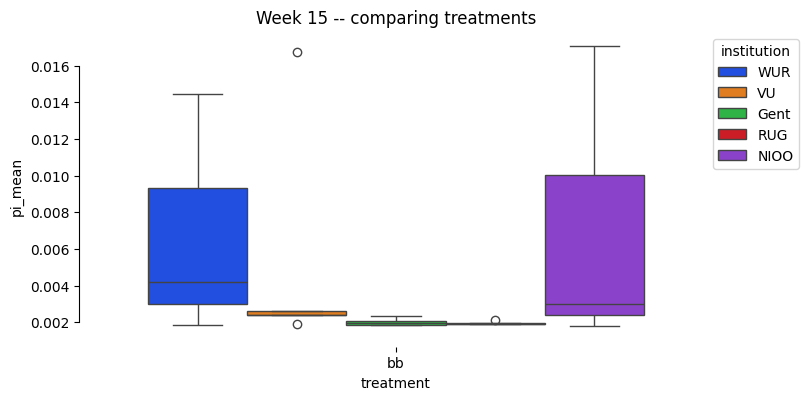

In [22]:
## hypothesis: different treatments have different diversity at the end of evolution

fig1, ax1 = plt.subplots(figsize=(8,4))
ax1 = sns.boxplot(data=overviewW15, x="treatment", y="pi_mean", hue="institution", palette="bright")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.despine(offset=5, trim=True)
plt.title('Week 15 -- comparing treatments')

In [26]:
f1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Coverage/test.jpg")